# CODIGO

In [68]:
import pandas as pd
import numpy as np

In [69]:
df=pd.read_excel('ranking_survey.xlsx')

In [70]:
df.drop('Unnamed: 3', inplace=True, axis=1)

In [71]:
for item in df.columns:
    print(item)

¿Te gustaría contar con la opción de generar rendimiento en tus activos digitales sin la necesidad de solicitar una línea de crédito con tarjeta Crecy?
¿Qué valor de *NEAR en MXN *planeas poner como garantía?
Prioridad #1
Prioridad #2
Prioridad #3
¿A cuántos meses te gustaría financiar la mayoría de las compras que hagas con tu tarjeta Crecy?


In [72]:
df=df.dropna().reset_index(drop=True)

In [73]:
new_name=columns=['Wish yield without CL','NEAR in MXN','P 1','P 2','P 3','Loan lenght']

In [74]:
cols={df.columns[k]: new_name[k] for k in range(6)}

In [75]:
# Rename columns
df.rename(columns=cols, inplace=True)

# Float numbers to do stats
df['NEAR in MXN']=df['NEAR in MXN'].astype(float)

# again, convert string data to numeric
df["Loan lenght"]= df["Loan lenght"].str.extract("(\d*\.?\d+)", expand=True).astype(int)

In [76]:
priorities=list(df['P 1'][0:3])
new_labels=['Impuestos', 'Liquidez','Rendimiento' ]

In [77]:
for item in priorities:
    print(item)

Quiero optimizar mis impuestos
Me da oportunidad de acceder a liquidez sin vender mis activos digitales
Me gusta que puedo generar rendimientos en mis criptos


In [78]:
dct={i: j for i, j in zip(priorities, new_labels)}
df.replace(dct, inplace=True)
df

,Wish yield without CL,NEAR in MXN,P 1,P 2,P 3,Loan lenght
0,1,16000.0,Impuestos,Liquidez,Liquidez,1
1,1,1500.0,Liquidez,Rendimiento,Impuestos,12
2,1,5000.0,Rendimiento,Liquidez,Impuestos,6
3,1,150000.0,Impuestos,Rendimiento,Liquidez,12
4,0,500.0,Impuestos,Rendimiento,Liquidez,12
...,...,...,...,...,...,...
121,1,6000.0,Liquidez,Rendimiento,Impuestos,6
122,1,5000.0,Liquidez,Rendimiento,Impuestos,3
123,1,50000.0,Liquidez,Impuestos,Rendimiento,3
124,1,25000.0,Impuestos,Rendimiento,Liquidez,1


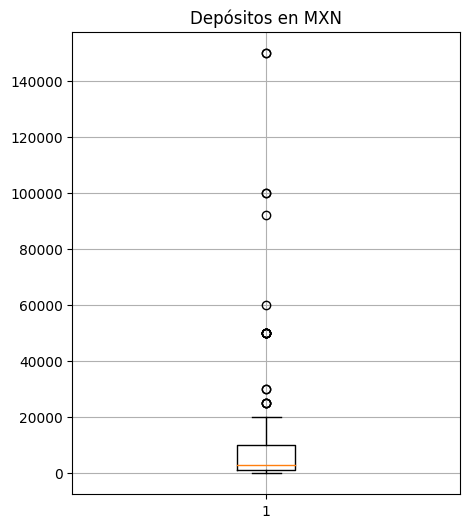

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,6))
plt.title('Depósitos en MXN')
plt.grid()
plt.boxplot(df['NEAR in MXN']);

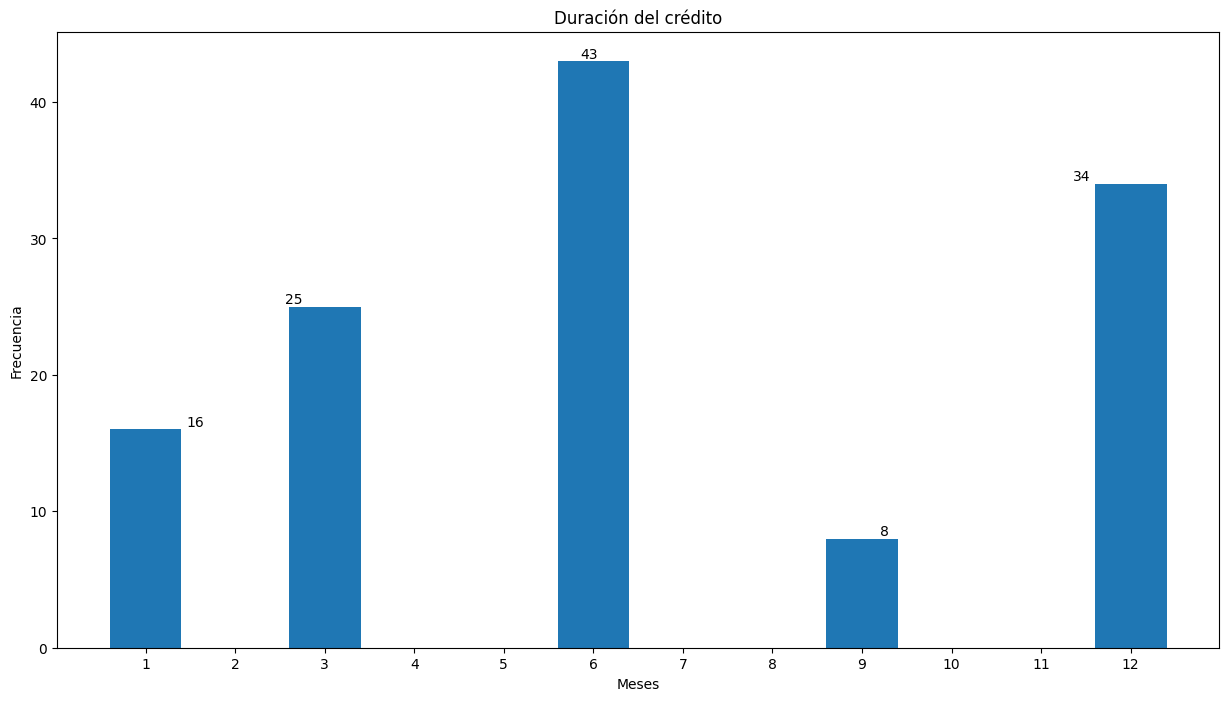

In [80]:
import matplotlib.pyplot as plt

data =df['Loan lenght']
plt.figure(figsize=(15,8))
plt.hist(data, bins=range(min(data), max(data) + 2), rwidth=0.8, align='left')
plt.xticks(range(min(data), max(data) + 1))
plt.xlabel('Meses')
plt.ylabel('Frecuencia')
plt.title('Duración del crédito')
for i, patch in enumerate(patches):
    if n[i] == 0:
        plt.text(patch.get_x() + patch.get_width()/2, patch.get_height(), "", ha='center', va='bottom')
    else:
        plt.text(patch.get_x() + patch.get_width()/2, patch.get_height(), str(int(n[i])), ha='center', va='bottom')
plt.show()

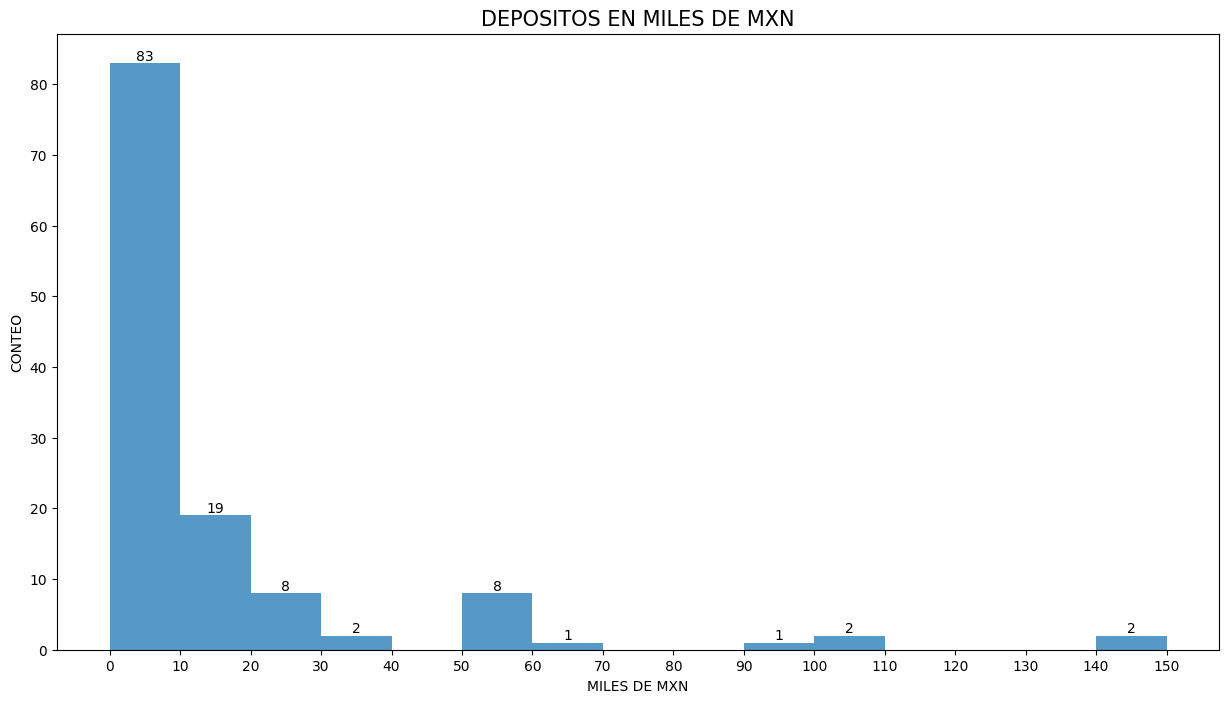

In [81]:
import matplotlib.pyplot as plt

data=df['NEAR in MXN']/1000
plt.figure(figsize=(15,8))
n, bins, patches = plt.hist(data, bins=15, alpha=0.75)
for i, patch in enumerate(patches):
    if n[i] == 0:
        plt.text(patch.get_x() + patch.get_width()/2, patch.get_height(), "", ha='center', va='bottom')
    else:
        plt.text(patch.get_x() + patch.get_width()/2, patch.get_height(), str(int(n[i])), ha='center', va='bottom')
plt.xlabel('MILES DE MXN', fontsize = 10)
plt.ylabel('CONTEO', fontsize = 10)
plt.title('DEPOSITOS EN MILES DE MXN', fontsize=15)
plt.xticks(bins, ['%.0f' % b for b in bins])

plt.show()

In [82]:
def ctr_update(key,val):
    counter[key]+=val
    return None

In [83]:
counter={item:0 for item in new_labels}
counter

{'Impuestos': 0, 'Liquidez': 0, 'Rendimiento': 0}

In [84]:
for k in range(len(df)):
    ctr_update(df.iloc[k,2],1)


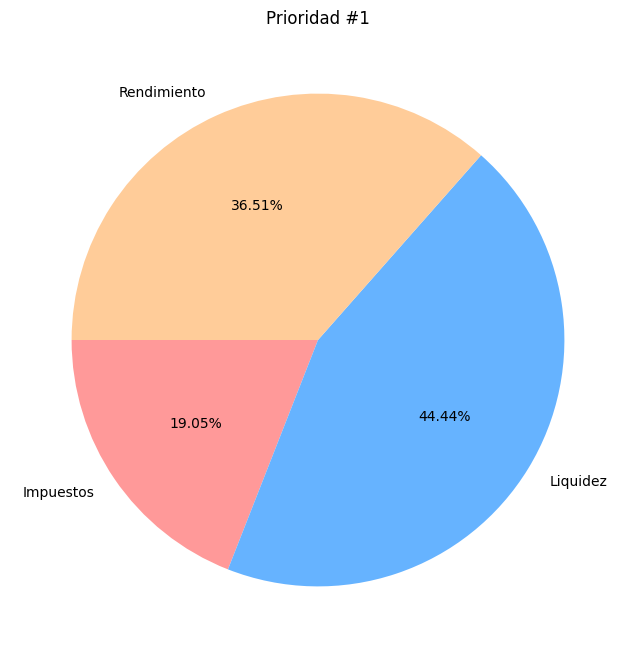

In [85]:
import matplotlib.pyplot as plt

colors = ['#ff9999','#66b3ff','#ffcc99']
plt.figure(figsize=(15,8))
plt.pie(counter.values(), labels=counter.keys(),colors=colors,
autopct='%1.2f%%', shadow=False, startangle=180)
plt.title('Prioridad #1')

plt.show()

# CUSTOMER CLUSTERING BY LOAN LENGHT

In this section we will cluster according to the duration of the loans.

In [90]:
df.drop('Wish yield without CL', axis=1).groupby('Loan lenght').describe()

NEAR in MXN                                                       \
                  count          mean           std     min     25%      50%   
Loan lenght                                                                    
1                  16.0  13906.250000  12318.304469  2000.0  5000.0  10000.0   
3                  25.0  11451.600000  23056.131583     5.0   500.0   2000.0   
6                  43.0   9564.883721  17672.039575    50.0  1000.0   3000.0   
9                   8.0  22635.000000  35141.063892    80.0  3000.0   7500.0   
12                 34.0  17085.882353  37030.822798     0.0   625.0   1585.0   

                                
                 75%       max  
Loan lenght                     
1            20000.0   50000.0  
3            10000.0  100000.0  
6             8000.0   92300.0  
9            20000.0  100000.0  
12           13750.0  150000.0

In [91]:
df.groupby('Loan lenght').agg(pd.Series.mode).drop(['Wish yield without CL', 'NEAR in MXN', 'P 2', 'P 3'], axis=1)

,P 1
Loan lenght,
1,Liquidez
3,Liquidez
6,"[Liquidez, Rendimiento]"
9,Rendimiento
12,Liquidez


## 1 month

In [125]:
One_month=df[df['Loan lenght']==1]

In [126]:
One_month.describe()

,Wish yield without CL,NEAR in MXN,Loan lenght
count,16.000000,16.000000,16.0
mean,0.812500,13906.250000,1.0
std,0.403113,12318.304469,0.0
min,0.000000,2000.000000,1.0
25%,1.000000,5000.000000,1.0
50%,1.000000,10000.000000,1.0
75%,1.000000,20000.000000,1.0
max,1.000000,50000.000000,1.0


In [127]:
counter={item:0 for item in new_labels}
counter

{'Impuestos': 0, 'Liquidez': 0, 'Rendimiento': 0}

In [128]:
for k in range(len(One_month)):
    ctr_update(df.iloc[k,2],1)

In [129]:
counter

{'Impuestos': 5, 'Liquidez': 7, 'Rendimiento': 4}

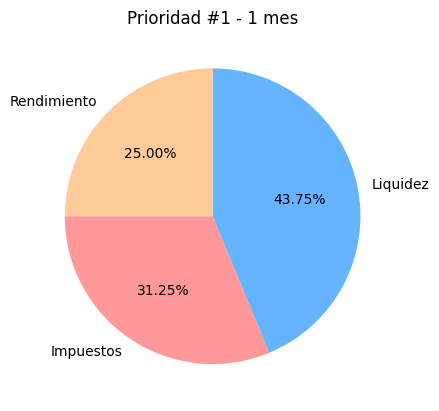

In [130]:
import matplotlib.pyplot as plt

colors = ['#ff9999','#66b3ff','#ffcc99']
plt.pie(counter.values(), labels=counter.keys(),colors=colors,
autopct='%1.2f%%', shadow=False, startangle=180)
plt.title('Prioridad #1 - 1 mes')
plt.show()

## 3 months

In [131]:
Three_mths=df[df['Loan lenght']==3]

In [132]:
Three_mths.describe()

,Wish yield without CL,NEAR in MXN,Loan lenght
count,25.000000,25.000000,25.0
mean,0.920000,11451.600000,3.0
std,0.276887,23056.131583,0.0
min,0.000000,5.000000,3.0
25%,1.000000,500.000000,3.0
50%,1.000000,2000.000000,3.0
75%,1.000000,10000.000000,3.0
max,1.000000,100000.000000,3.0


In [133]:
counter={item:0 for item in new_labels}
counter

{'Impuestos': 0, 'Liquidez': 0, 'Rendimiento': 0}

In [134]:
for k in range(len(Three_mths)):
    ctr_update(df.iloc[k,2],1)

In [135]:
counter

{'Impuestos': 8, 'Liquidez': 10, 'Rendimiento': 7}

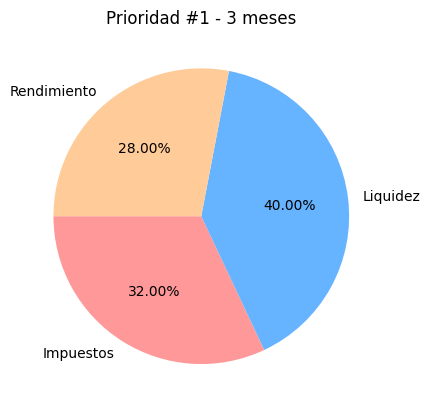

In [136]:
import matplotlib.pyplot as plt

colors = ['#ff9999','#66b3ff','#ffcc99']
plt.pie(counter.values(), labels=counter.keys(),colors=colors,
autopct='%1.2f%%', shadow=False, startangle=180)
plt.title('Prioridad #1 - 3 meses')
plt.show()

## 6 months

In [137]:
Six_mths=df[df['Loan lenght']==6]

In [138]:
Six_mths.describe()

,Wish yield without CL,NEAR in MXN,Loan lenght
count,43.000000,43.000000,43.0
mean,0.930233,9564.883721,6.0
std,0.257770,17672.039575,0.0
min,0.000000,50.000000,6.0
25%,1.000000,1000.000000,6.0
50%,1.000000,3000.000000,6.0
75%,1.000000,8000.000000,6.0
max,1.000000,92300.000000,6.0


In [139]:
counter={item:0 for item in new_labels}
counter

{'Impuestos': 0, 'Liquidez': 0, 'Rendimiento': 0}

In [140]:
for k in range(len(Six_mths)):
    ctr_update(df.iloc[k,2],1)

In [141]:
counter

{'Impuestos': 11, 'Liquidez': 19, 'Rendimiento': 13}

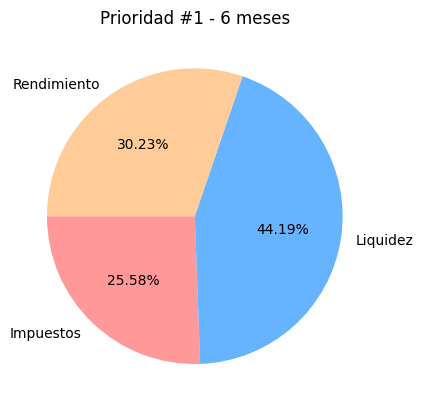

In [142]:
import matplotlib.pyplot as plt

colors = ['#ff9999','#66b3ff','#ffcc99']
plt.pie(counter.values(), labels=counter.keys(),colors=colors,
autopct='%1.2f%%', shadow=False, startangle=180)
plt.title('Prioridad #1 - 6 meses')
plt.show()

## 12 months

In [143]:
Tlv_mths=df[df['Loan lenght']==12]

In [144]:
Tlv_mths.describe()

,Wish yield without CL,NEAR in MXN,Loan lenght
count,34.000000,34.000000,34.0
mean,0.823529,17085.882353,12.0
std,0.386953,37030.822798,0.0
min,0.000000,0.000000,12.0
25%,1.000000,625.000000,12.0
50%,1.000000,1585.000000,12.0
75%,1.000000,13750.000000,12.0
max,1.000000,150000.000000,12.0


In [145]:
counter={item:0 for item in new_labels}
counter

{'Impuestos': 0, 'Liquidez': 0, 'Rendimiento': 0}

In [146]:
for k in range(len(Tlv_mths)):
    ctr_update(df.iloc[k,2],1)

In [147]:
counter

{'Impuestos': 10, 'Liquidez': 13, 'Rendimiento': 11}

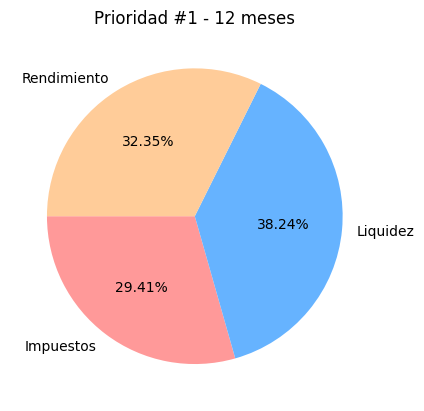

In [148]:
import matplotlib.pyplot as plt

colors = ['#ff9999','#66b3ff','#ffcc99']
plt.pie(counter.values(), labels=counter.keys(),colors=colors,
autopct='%1.2f%%', shadow=False, startangle=180)
plt.title('Prioridad #1 - 12 meses')
plt.show()

# CORRELATION MATRIX

In this section we'll rescale (logarithm function) the 'Near' amounts since the behavior of the amounts is 'pareto-like'.
Then we'll standarize the 'Near' deposits and then perform a 'One Hot Encoding' to the 'Priorities' variables.

This should improve the overall quality of the data analysis.

In [121]:
df2=df.copy()
df2.drop(['P 2','P 3'],axis=1, inplace=True)

In [122]:
# Perform one-hot encoding on all columns
one_hot = pd.get_dummies(df2, columns=['P 1'], drop_first=False)
one_hot

,Wish yield without CL,NEAR in MXN,Loan lenght,P 1_Impuestos,P 1_Liquidez,P 1_Rendimiento
0,1,16000.0,1,1,0,0
1,1,1500.0,12,0,1,0
2,1,5000.0,6,0,0,1
3,1,150000.0,12,1,0,0
4,0,500.0,12,1,0,0
...,...,...,...,...,...,...
121,1,6000.0,6,0,1,0
122,1,5000.0,3,0,1,0
123,1,50000.0,3,0,1,0
124,1,25000.0,1,1,0,0


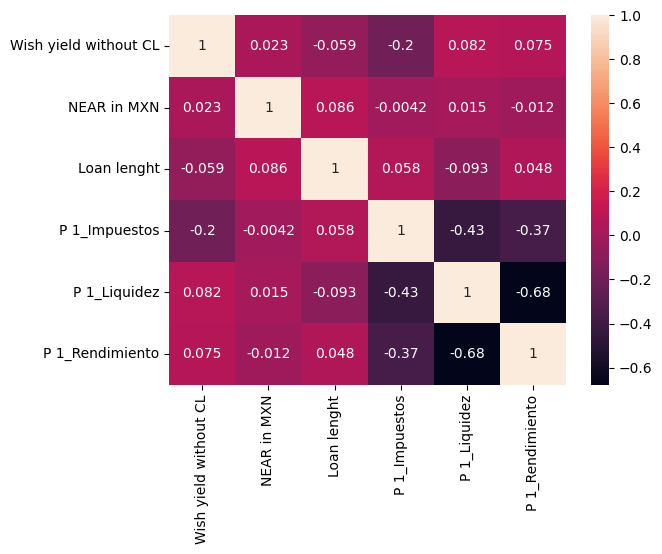

In [124]:
import seaborn as sns
sns.heatmap(one_hot.corr(),annot=True );

# FINAL REMARKS

1. By clustering customers through different criteria, they show that their greatest appetite is for liquidity.
2. The holders are not that much concerned in 'Taxes', there's a negative 0.2 lineal correlation between the desire to accumulate (staking) yield against the desire to optimize taxes.
3. Liquidity and yield are strongly negatively correlated (-0.68).
4. It cannot be said that customers are segmented by purchasing power, the correlations are close to zero. After  rescaling and standardization, correlation is still minuscule.
5. Respondents with NEAR tokens show a heavy-tailed distribution (and positive bias) with respect to deposits.